<a href="https://colab.research.google.com/github/Noman-Sajal/Employment-Rate-Prediction-by-Neural-Network/blob/main/final_work_80_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the downloaded JSON file
with open('countries_data.json', 'r') as file:
    countries_data = json.load(file)

# Extract country, continent, area, latitude, and longitude information
country_info_list = []
for country in countries_data:
    country_name = country.get('name', {}).get('common')
    continent = country.get('region')
    area = country.get('area')  # Get the area
    latlng = country.get('latlng', [])  # Get latitude and longitude
    latitude = latlng[0] if len(latlng) > 0 else None  # First element is latitude
    longitude = latlng[1] if len(latlng) > 1 else None  # Second element is longitude

    country_info_list.append({
        'Country Name': country_name,
        'Continent': continent,
        'Area': area,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Convert the country information into a DataFrame
country_info_df = pd.DataFrame(country_info_list)

# Display the first few rows to verify the changes
print(country_info_df.head())


    Country Name  Continent     Area   Latitude  Longitude
0  South Georgia  Antarctic   3903.0 -54.500000 -37.000000
1        Grenada   Americas    344.0  12.116667 -61.666667
2    Switzerland     Europe  41284.0  47.000000   8.000000
3   Sierra Leone     Africa  71740.0   8.500000 -11.500000
4        Hungary     Europe  93028.0  47.000000  20.000000


In [2]:
# Load the World Bank datasets
gdp_df = pd.read_csv('gdp_data.csv')
labor_force_df = pd.read_csv('labor_force_data.csv')
inflation_df = pd.read_csv('inflation_data.csv')
population_growth_df = pd.read_csv('population_growth_data.csv')
gdp_growth_df = pd.read_csv('gdp_growth_data.csv')
trade_df = pd.read_csv('trade_data.csv')
employment_df = pd.read_csv('employment_data.csv')


In [3]:
# Create a set of unique country names from both datasets to check mismatches
world_bank_countries = set(gdp_df['Country Name'].unique())
api_countries = set(country_info_df['Country Name'].unique())

# Find mismatches: Countries in the World Bank dataset not in the API dataset
mismatched_countries = world_bank_countries - api_countries

# Display mismatched countries
print(f"Number of mismatched countries: {len(mismatched_countries)}")
print("Mismatched countries:", mismatched_countries)


# Dictionary to map country names from API to World Bank dataset format
country_name_mapping = {
    'Bahamas': 'Bahamas, The',
    'Brunei': 'Brunei Darussalam',
    'Cape Verde': 'Cabo Verde',
    'Republic of the Congo': 'Congo, Rep.',
    'DR Congo':'Congo, Dem. Rep.',
    'Ivory Coast':"Cote d'Ivoire",
    'Curaçao': 'Curacao',
    'Egypt': 'Egypt, Arab Rep.',
    'Gambia': 'Gambia, The',
    'Hong Kong': 'Hong Kong SAR, China',
    'Iran': 'Iran, Islamic Rep.',
    'North Korea': 'Korea, Dem. People’s Rep.',
    'South Korea': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Yemen': 'Yemen, Rep.',
    'Laos': 'Lao PDR',
    'Macau': 'Macao SAR, China',
    'Micronesia': 'Micronesia, Fed. Sts.',
    'Russia': 'Russian Federation',
    'São Tomé and Príncipe': 'Sao Tome and Principe',
    'Sint Maarten': 'Sint Maarten (Dutch part)',
    'Slovakia': 'Slovak Republic',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Martin': 'St. Martin (French part)',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'British Virgin Islands': 'Virgin Islands (U.S.)',
    'Syria': 'Syrian Arab Republic',
    'Turkey': 'Turkiye',
    'Venezuela': 'Venezuela, RB',
    'Vietnam': 'Viet Nam'
}


Number of mismatched countries: 34
Mismatched countries: {"Cote d'Ivoire", 'Turkiye', nan, 'Virgin Islands (U.S.)', 'Hong Kong SAR, China', 'Brunei Darussalam', 'Channel Islands', 'Sint Maarten (Dutch part)', 'Curacao', 'Bahamas, The', "Korea, Dem. People's Rep.", 'Viet Nam', 'West Bank and Gaza', 'St. Martin (French part)', 'St. Vincent and the Grenadines', 'Cabo Verde', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Yemen, Rep.', 'Macao SAR, China', 'St. Kitts and Nevis', 'Lao PDR', 'Syrian Arab Republic', 'Gambia, The', 'Venezuela, RB', 'Iran, Islamic Rep.', 'Korea, Rep.', 'Russian Federation', 'Sao Tome and Principe', 'Kyrgyz Republic', 'Micronesia, Fed. Sts.', 'Slovak Republic', 'St. Lucia', 'Egypt, Arab Rep.'}


In [4]:
# Define a function to merge datasets and reorder columns
def merge_and_reorder(df, country_info_df):
    merged_df = pd.merge(df, country_info_df, on='Country Name', how='left')

    # Reorder columns to place 'Continent', 'Area', 'Latitude', and 'Longitude' in the desired positions
    columns = merged_df.columns.tolist()
    columns_to_move = ['Continent', 'Area', 'Latitude', 'Longitude']

    # Remove the columns from their current positions
    for col in columns_to_move:
        columns.remove(col)

    # Insert the columns in the desired positions (after 'Country Name' and 'Country Code')
    for i, col in enumerate(columns_to_move):
        columns.insert(3 + i, col)  # Insert starting at index 3 for 4th position

    # Reorder the DataFrame using the new column order
    return merged_df[columns]

# Function to clean unwanted footer text (Meta Data) from DataFrames
def clean_footer(df):
    # Replace footer text with NaN
    footer_texts = ["Data from database: World Development Indicators", "Last Updated: 09/19/2024"]
    for footer in footer_texts:
        df.replace(footer, pd.NA, inplace=True)
    return df.dropna(how='all')
# Merge each dataset with country_info_df and clean footer texts
gdp_merged = clean_footer(merge_and_reorder(gdp_df, country_info_df))
labor_force_merged = clean_footer(merge_and_reorder(labor_force_df, country_info_df))
inflation_merged = clean_footer(merge_and_reorder(inflation_df, country_info_df))
population_growth_merged = clean_footer(merge_and_reorder(population_growth_df, country_info_df))
gdp_growth_merged = clean_footer(merge_and_reorder(gdp_growth_df, country_info_df))
trade_merged = clean_footer(merge_and_reorder(trade_df, country_info_df))
employment_merged = clean_footer(merge_and_reorder(employment_df, country_info_df))

# Step 11: Concatenate all merged datasets into a single DataFrame
combined_df = pd.concat([
    gdp_merged,
    labor_force_merged,
    inflation_merged,
    population_growth_merged,
    gdp_growth_merged,
    trade_merged,
    employment_merged
], ignore_index=True)

# Display the first few rows and check the shape of the combined dataset
print("Shape of the combined DataFrame:", combined_df.shape)
combined_df.head()


Shape of the combined DataFrame: (1519, 32)


,Series Name,Series Code,Country Name,Continent,Area,Latitude,Longitude,Country Code,2000 [YR2000],2001 [YR2001],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,Asia,652230.0,33.000000,65.0,AFG,3521418059.92345,2813571753.87253,...,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,..
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,Europe,28748.0,41.000000,20.0,ALB,3480355258.04122,3922100793.5403,...,13228147516.1168,11386853113.0189,11861199830.8396,13019726211.7369,15156424015.1977,15401826127.2539,15162734205.2462,17930565118.8176,18916378860.5488,22977677860.7979
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,Africa,2381741.0,28.000000,3.0,DZA,54790398570.3282,59413400923.6364,...,238942664192.59,187493855609.345,180763839522.151,189880896903.073,194554483655.528,193459662090.677,164873415325.201,186265418570.697,225560256621.757,239899491127.742
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,Oceania,199.0,-14.333333,-170.0,ASM,..,..,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,Europe,468.0,42.500000,1.5,AND,1432606188.69324,1548265808.05802,...,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3324683011.5903,3380602042.84283,3727673593.01922


In [5]:
# Handle missing values by counting NaNs, zeros, and placeholder values
nan_count = combined_df.isna().sum().sum()
zero_count = (combined_df == 0).sum().sum()
placeholder_count = (combined_df == '..').sum().sum()

# Display the counts of missing values
print(f"Total NaN values: {nan_count}")
print(f"Total 0 values: {zero_count}")
print(f"Total placeholder values ('..'): {placeholder_count}")
# Check the shape
print("Shape of the DataFrame:", combined_df.shape)


Total NaN values: 924
Total 0 values: 0
Total placeholder values ('..'): 3806
Shape of the DataFrame: (1519, 32)


In [6]:
# Replace '..' with NaN
combined_df.replace('..', pd.NA, inplace=True)

# Drop rows where 'Continent' is NaN or empty or 0
combined_df = combined_df.dropna(subset=['Continent'])
# combined_df = combined_df[combined_df['Continent'] != 0]

# Display the shape of the DataFrame after dropping rows
print("Shape of the DataFrame after dropping rows with NaN or empty values in 'Continent':", combined_df.shape)

# Display the first few rows to verify the changes
combined_df.head()


Shape of the DataFrame after dropping rows with NaN or empty values in 'Continent': (1288, 32)


,Series Name,Series Code,Country Name,Continent,Area,Latitude,Longitude,Country Code,2000 [YR2000],2001 [YR2001],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,Asia,652230.0,33.000000,65.0,AFG,3521418059.92345,2813571753.87253,...,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,<NA>
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,Europe,28748.0,41.000000,20.0,ALB,3480355258.04122,3922100793.5403,...,13228147516.1168,11386853113.0189,11861199830.8396,13019726211.7369,15156424015.1977,15401826127.2539,15162734205.2462,17930565118.8176,18916378860.5488,22977677860.7979
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,Africa,2381741.0,28.000000,3.0,DZA,54790398570.3282,59413400923.6364,...,238942664192.59,187493855609.345,180763839522.151,189880896903.073,194554483655.528,193459662090.677,164873415325.201,186265418570.697,225560256621.757,239899491127.742
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,Oceania,199.0,-14.333333,-170.0,ASM,<NA>,<NA>,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,<NA>
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,Europe,468.0,42.500000,1.5,AND,1432606188.69324,1548265808.05802,...,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3324683011.5903,3380602042.84283,3727673593.01922


In [7]:

#  Melt the dataframe, including additional columns for 'Longitude', 'Latitude', and 'Area'
melted_df = combined_df.melt(
    id_vars=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Series Name'],
    value_vars=[col for col in combined_df.columns if '[YR' in col],
    var_name='Year',
    value_name='Value'
)

# Clean 'Year' to extract only the year number and ensure it's an integer
melted_df['Year'] = melted_df['Year'].str.extract(r'(\d{4})').astype(int)

# Ensure 'Value' is numeric, converting any non-numeric entries to NaN
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')

# Pivot on 'Country Name' and 'Year' to get year-wise data per country and indicator
pivoted_df = melted_df.pivot_table(
    index=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Flatten the columns after pivoting
pivoted_df.columns.name = None

# Convert 'Year' column to integer (if it somehow turns into a float during processing)
pivoted_df['Year'] = pivoted_df['Year'].astype(int)

#  Define the threshold for missing values (10%)
threshold = 0.1  # 10%
threshold_num = int(pivoted_df.shape[1] * threshold)

# Drop rows where NaN, empty, '0', or placeholder values exceed the threshold
rows_to_drop = pivoted_df[
    (pivoted_df.isna().sum(axis=1) > threshold_num) |
    ((pivoted_df == '').sum(axis=1) > threshold_num) |
    ((pivoted_df == '..').sum(axis=1) > threshold_num) |
    ((pivoted_df == 0).sum(axis=1) > threshold_num)
]

pivoted_df.drop(rows_to_drop.index, inplace=True)

#  Convert all columns to numeric where applicable, handling non-numerical values as NaN
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].apply(pd.to_numeric, errors='coerce')  # Start from the 7th column onward for data

# Fill remaining missing values in the data columns (assuming columns after 'Year' are indicators)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].bfill(axis=1)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].ffill(axis=1)

# Final check
print("Shape of the DataFrame after handling missing values:", pivoted_df.shape)
pivoted_df.head()


Shape of the DataFrame after handling missing values: (3698, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [8]:
# Count the number of rows for each country
country_row_counts = pivoted_df['Country Name'].value_counts().reset_index()

# Rename columns for clarity
country_row_counts.columns = ['Country Name', 'Row Count']

# Display the entire DataFrame without truncation
pd.set_option('display.max_rows', None)  # Show all rows
print("Full list of row counts for each country:")
print(country_row_counts)


Full list of row counts for each country:
                 Country Name  Row Count
0                      Israel         24
1                    Mongolia         24
2                        Mali         24
3                       Malta         24
4                  Mauritania         24
5                   Mauritius         24
6                      Mexico         24
7                     Moldova         24
8                  Montenegro         24
9                     Ireland         24
10                    Morocco         24
11                 Mozambique         24
12        Trinidad and Tobago         24
13                    Namibia         24
14                      Nepal         24
15                Netherlands         24
16                   Maldives         24
17                   Malaysia         24
18                     Malawi         24
19                 Madagascar         24
20                 Luxembourg         24
21                  Lithuania         24
22             

In [9]:
#  Count the number of years of data for each country
country_row_counts = pivoted_df['Country Name'].value_counts().reset_index()
country_row_counts.columns = ['Country Name', 'Row Count']

# Filter out countries with less than 17 years of data
filtered_country_row_counts_df = country_row_counts[country_row_counts['Row Count'] >= 17]

# Get the list of valid countries
valid_countries = filtered_country_row_counts_df['Country Name'].tolist()

# Filter the main pivoted_df to only include rows from valid countries
filtered_main_df = pivoted_df[pivoted_df['Country Name'].isin(valid_countries)]


# Drop the year 2023 from the filtered DataFrame
filtered_main_df = filtered_main_df[filtered_main_df['Year'] != 2023]

# Display the shape of the DataFrame after dropping 2023
print("Shape of the DataFrame after dropping the year 2023:", filtered_main_df.shape)
filtered_main_df.head()  # Display the first few rows of the updated DataFrame



Shape of the DataFrame after dropping the year 2023: (3515, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [10]:
# Check basic statistics and data types
print(filtered_main_df.info())
print(filtered_main_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3515 entries, 5 to 4414
Data columns (total 13 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Country Name                                                                                   3515 non-null   object 
 1   Continent                                                                                      3515 non-null   object 
 2   Longitude                                                                                      3515 non-null   float64
 3   Latitude                                                                                       3515 non-null   float64
 4   Area                                                                                           3515 non-null   float64
 5   Year                     

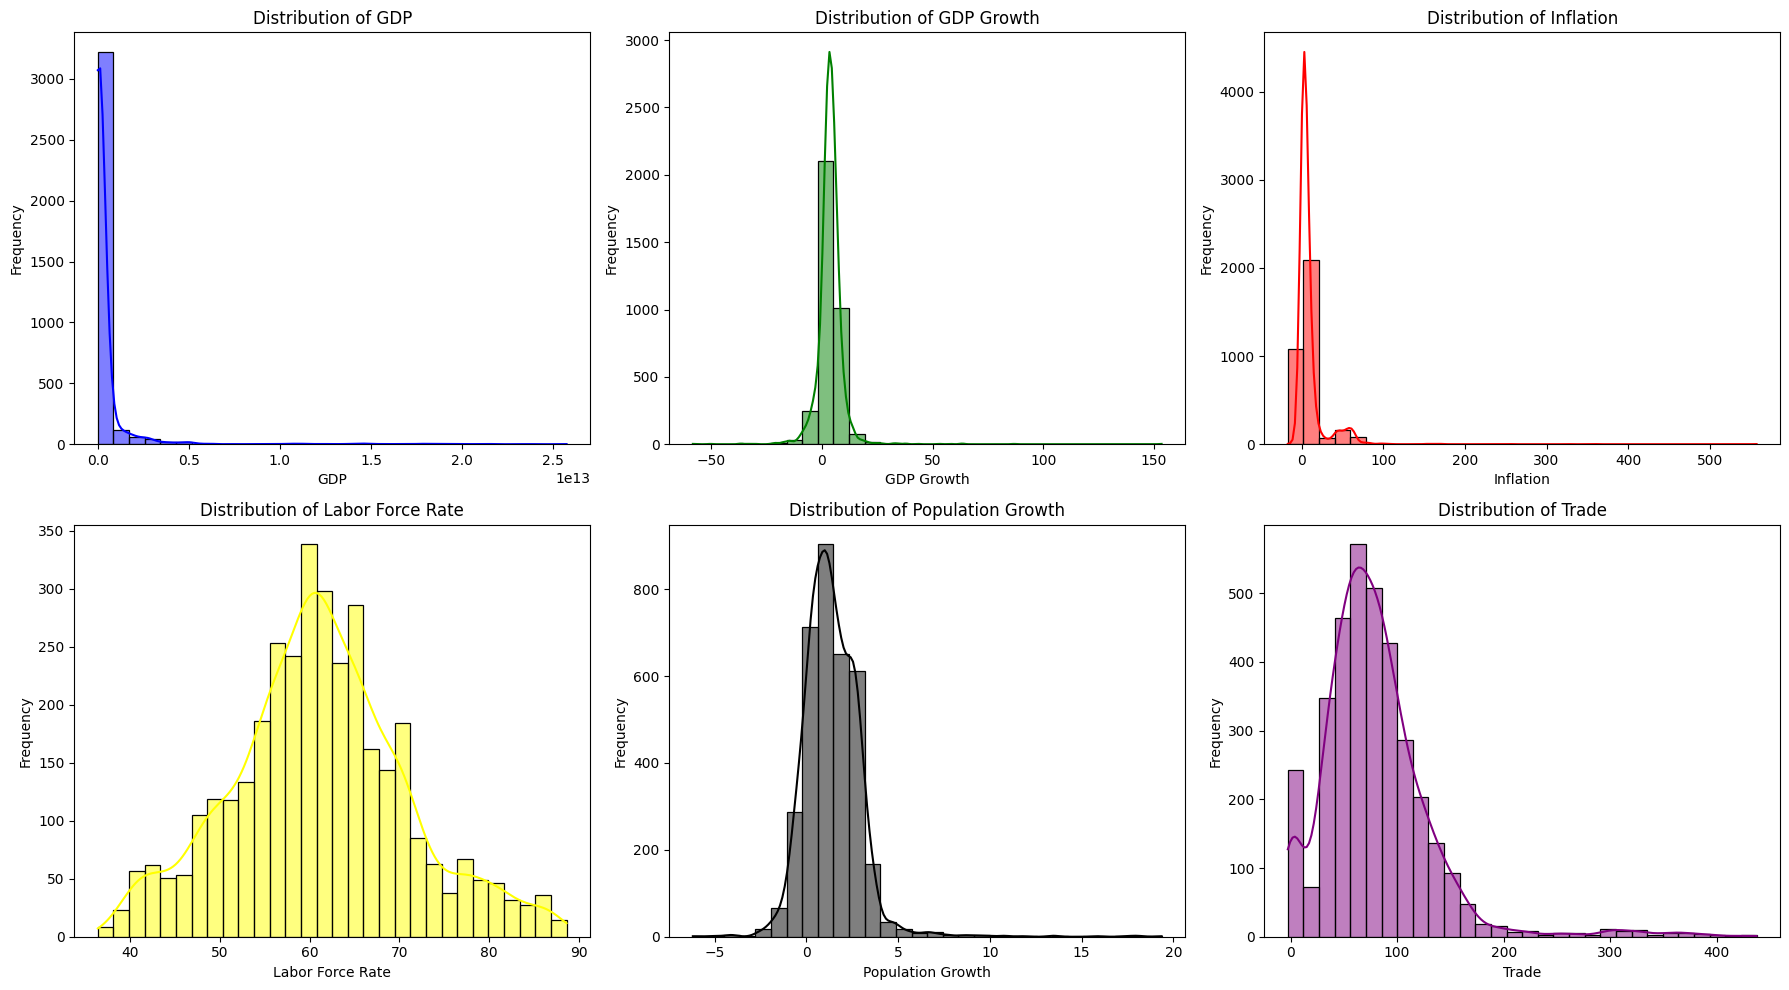

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the required columns for prediction and analysis
df = filtered_main_df[['Country Name', 'Continent', 'Year',
         'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
         'GDP (current US$)', 'GDP growth (annual %)',
         'Inflation, consumer prices (annual %)',
         'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
         'Population growth (annual %)', 'Trade (% of GDP)']]

# Rename columns for better readability
df_renamed = df.rename(columns={
    'GDP (current US$)': 'GDP',
    'GDP growth (annual %)': 'GDP Growth',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)': 'Labor Force Rate',
    'Population growth (annual %)': 'Population Growth',
    'Trade (% of GDP)': 'Trade',
    'Employment to population ratio, 15+, total (%) (modeled ILO estimate)': 'Employment Rate'
})

# **Feature Distribution (Histograms) for Input Features**
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# List of input features and their respective colors
input_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']
colors = ['blue', 'green', 'red', 'yellow', 'black', 'purple']

# Plot histograms with different colors
for i, (feature, color) in enumerate(zip(input_features, colors)):
    sns.histplot(df_renamed[feature], ax=axes[i//3, i%3], kde=True, bins=30, color=color)
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
    axes[i//3, i%3].set_xlabel(feature)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


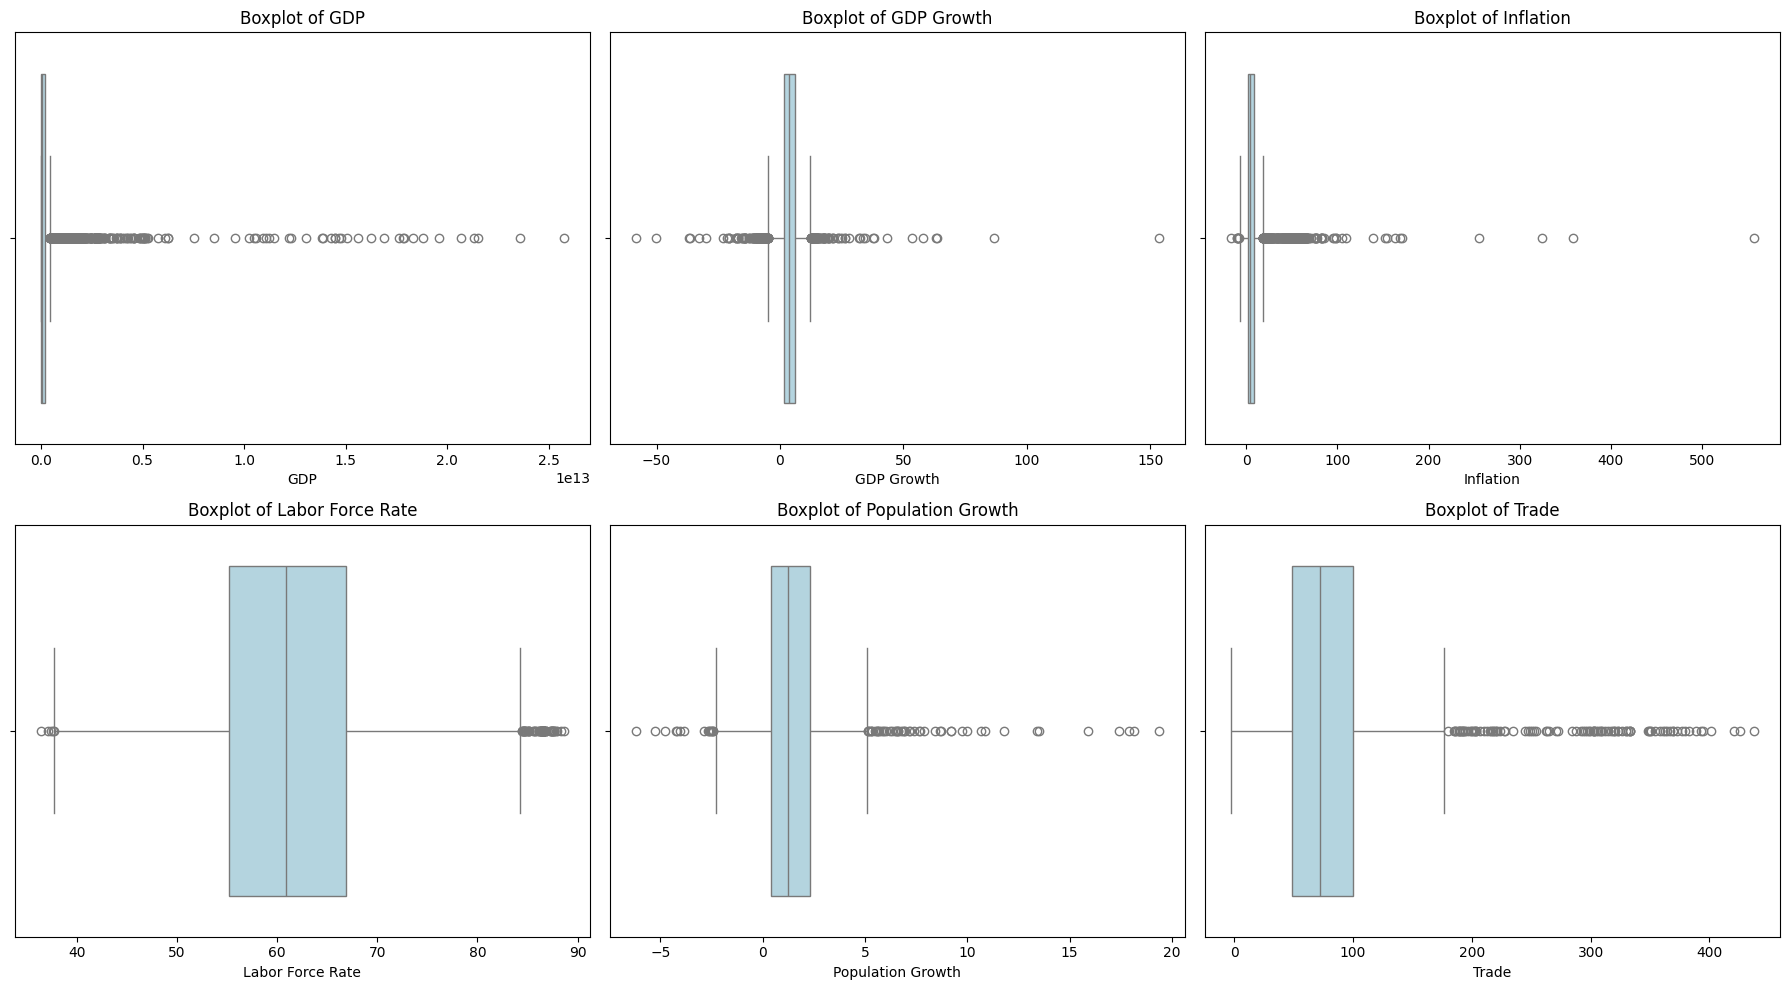

In [12]:
# Check for outliers using boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(input_features):
    sns.boxplot(x=df_renamed[feature], ax=axes[i//3, i%3], color='lightblue')
    axes[i//3, i%3].set_title(f'Boxplot of {feature}')
    axes[i//3, i%3].set_xlabel(feature)

plt.tight_layout()
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for scaling
numeric_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric features
df_renamed[numeric_features] = scaler.fit_transform(df_renamed[numeric_features])

# Check the scaled values
print(df_renamed.head())


  Country Name Continent  Year  Employment Rate       GDP  GDP Growth  \
5  Afghanistan      Asia  2005           43.311 -0.236663    1.230864   
6  Afghanistan      Asia  2006           43.259 -0.236202    0.272020   
7  Afghanistan      Asia  2007           43.216 -0.234537    1.654843   
8  Afghanistan      Asia  2008           43.178 -0.234321    0.038131   
9  Afghanistan      Asia  2009           43.153 -0.232937    2.889944   

   Inflation  Labor Force Rate  Population Growth     Trade  
5   0.151142         -1.442052           1.381362 -1.441126  
6  -0.135433         -1.447786           1.736699 -1.430416  
7  -0.043368         -1.452700           0.256165 -1.475040  
8   0.817964         -1.456693           0.388122 -1.471062  
9  -0.795620         -1.459663           1.371759 -1.441415  


In [14]:
# One-hot encoding for categorical variables (if necessary)
df_encoded = pd.get_dummies(df_renamed, columns=['Country Name', 'Continent'], drop_first=True)

# Check the encoded dataset
print(df_encoded.head())


   Year  Employment Rate       GDP  GDP Growth  Inflation  Labor Force Rate  \
5  2005           43.311 -0.236663    1.230864   0.151142         -1.442052   
6  2006           43.259 -0.236202    0.272020  -0.135433         -1.447786   
7  2007           43.216 -0.234537    1.654843  -0.043368         -1.452700   
8  2008           43.178 -0.234321    0.038131   0.817964         -1.456693   
9  2009           43.153 -0.232937    2.889944  -0.795620         -1.459663   

   Population Growth     Trade  Country Name_Albania  Country Name_Algeria  \
5           1.381362 -1.441126                 False                 False   
6           1.736699 -1.430416                 False                 False   
7           0.256165 -1.475040                 False                 False   
8           0.388122 -1.471062                 False                 False   
9           1.371759 -1.441415                 False                 False   

   ...  Country Name_United States  Country Name_Uruguay

In [15]:
# Calculate IQR for each feature and remove outliers
Q1 = df_renamed[numeric_features].quantile(0.25)
Q3 = df_renamed[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Remove rows with outliers
df_no_outliers = df_renamed[~((df_renamed[numeric_features] < (Q1 - 1.5 * IQR)) | (df_renamed[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original dataset size: {df_renamed.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")


Original dataset size: 3515
Dataset size after removing outliers: 2332


In [16]:
# Ensure that you are using the correct numeric columns for clipping
numeric_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Cap values based on the IQR method
lower_bound = Q1[numeric_features] - 1.5 * IQR[numeric_features]
upper_bound = Q3[numeric_features] + 1.5 * IQR[numeric_features]

# Clip the values within the bounds
df_capped = df_renamed.copy()

# Clip values outside the bounds for each feature
for feature in numeric_features:
    df_capped[feature] = df_capped[feature].clip(lower=lower_bound[feature], upper=upper_bound[feature])

# Check the dataset after capping outliers
print(f"Dataset after capping outliers:\n{df_capped.describe()}")


Dataset after capping outliers:
              Year  Employment Rate          GDP   GDP Growth    Inflation  \
count  3515.000000      3515.000000  3515.000000  3515.000000  3515.000000   
mean   2011.007397        56.707754    -0.169643    -0.005781    -0.182140   
std       6.606507        11.049559     0.094946     0.618870     0.272102   
min    2000.000000        29.903000    -0.240275    -1.410803    -0.843960   
25%    2005.000000        49.890500    -0.235145    -0.345011    -0.375481   
50%    2011.000000        56.547000    -0.221911     0.009284    -0.273781   
75%    2017.000000        63.316500    -0.129531     0.365516    -0.063162   
max    2022.000000        88.518000     0.028891     1.431308     0.405317   

       Labor Force Rate  Population Growth        Trade  
count       3515.000000        3515.000000  3515.000000  
mean          -0.003496          -0.026068    -0.058311  
std            0.991009           0.839094     0.783028  
min           -2.399116          

In [17]:
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler

# Step 1: Apply Log Transformation to GDP (only for positive values)
df_capped['GDP'] = df_capped['GDP'].apply(lambda x: np.log(x) if x > 0 else x)

# Step 2: Apply Winsorization to GDP Growth, Inflation, and Labor Force Rate
numeric_features_winsorize = ['GDP Growth', 'Inflation', 'Labor Force Rate']
for feature in numeric_features_winsorize:
    df_capped[feature] = mstats.winsorize(df_capped[feature], limits=[0.05, 0.05])  # Cap at 5th and 95th percentile

# Step 3: Standardize Labor Force Rate, Population Growth, and Trade
scaler = StandardScaler()
df_capped[['Labor Force Rate', 'Population Growth', 'Trade']] = scaler.fit_transform(
    df_capped[['Labor Force Rate', 'Population Growth', 'Trade']]
)

# Show the transformed data
print("Dataset after transformations:")
print(df_capped.describe())


Dataset after transformations:
              Year  Employment Rate          GDP   GDP Growth    Inflation  \
count  3515.000000      3515.000000  3515.000000  3515.000000  3515.000000   
mean   2011.007397        56.707754    -0.703684    -0.011293    -0.179190   
std       6.606507        11.049559     1.247529     0.575090     0.267911   
min    2000.000000        29.903000   -10.153350    -1.242493    -0.478389   
25%    2005.000000        49.890500    -0.238741    -0.345011    -0.375481   
50%    2011.000000        56.547000    -0.231901     0.009284    -0.273781   
75%    2017.000000        63.316500    -0.204780     0.365516    -0.063162   
max    2022.000000        88.518000    -0.000361     1.081580     0.405317   

       Labor Force Rate  Population Growth         Trade  
count      3.515000e+03       3.515000e+03  3.515000e+03  
mean       8.085835e-18      -2.425750e-17  1.415021e-17  
std        1.000142e+00       1.000142e+00  1.000142e+00  
min       -1.867541e+00      -

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

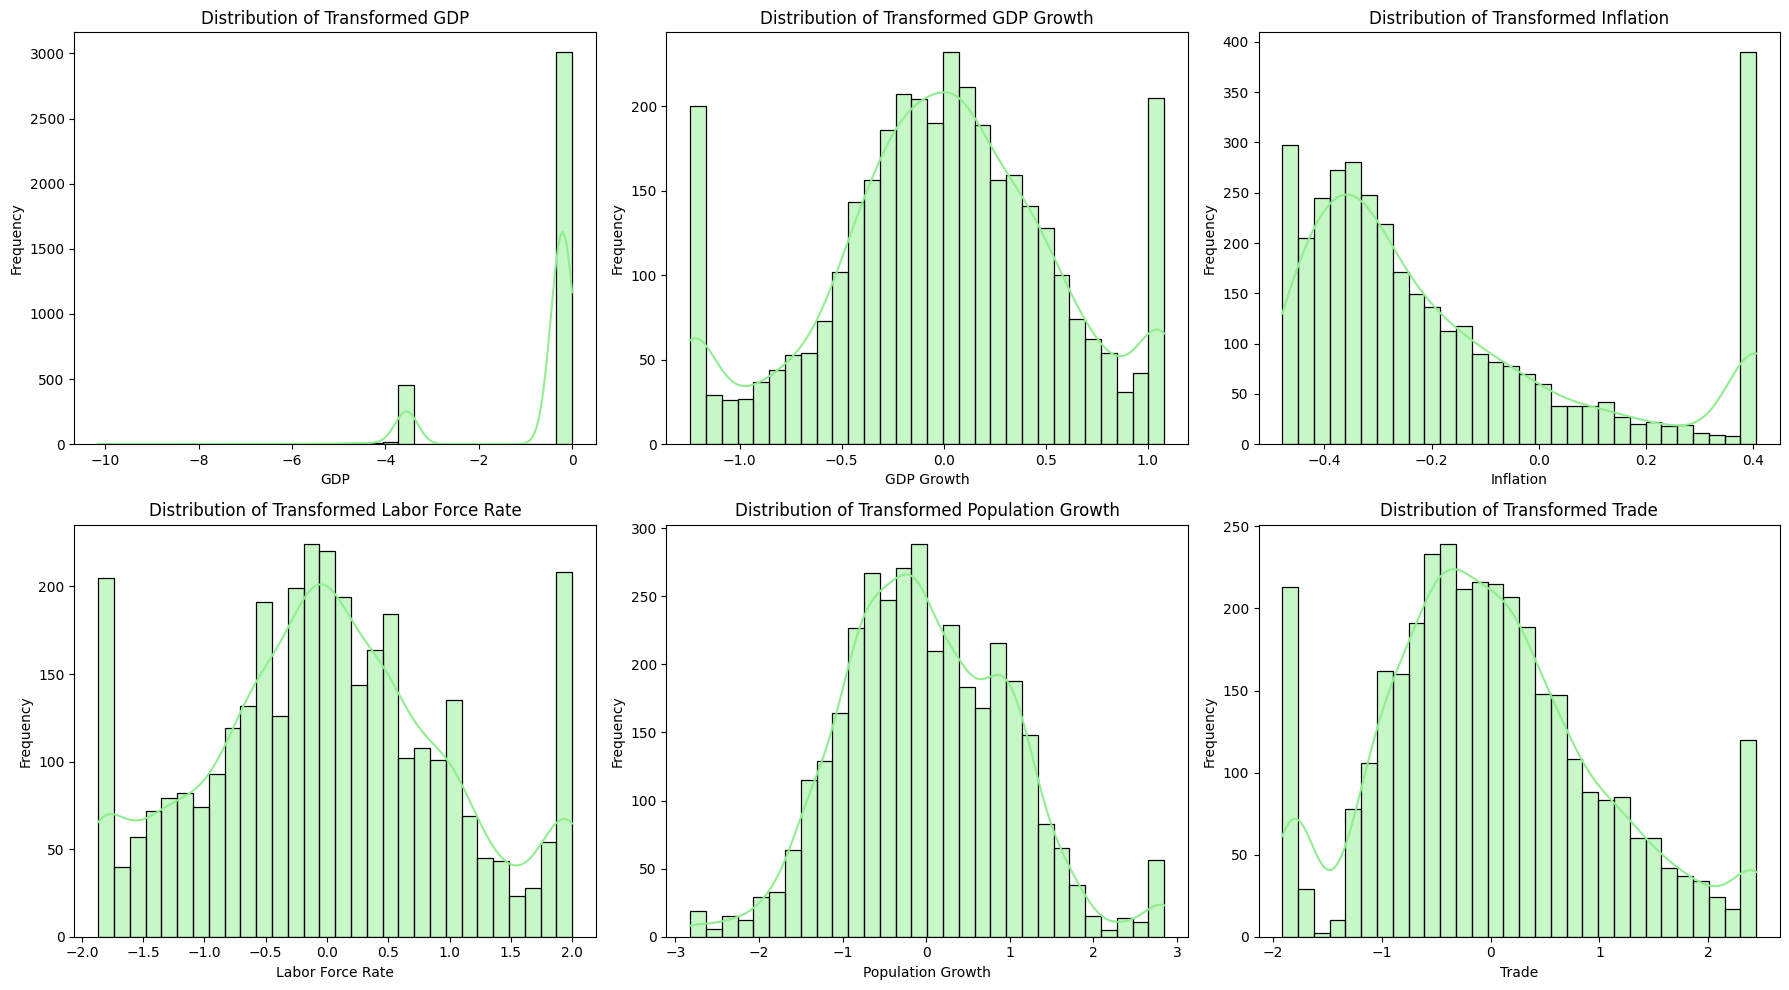

In [18]:
# Visualizing the transformed features to check distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot histograms for transformed features
input_features_transformed = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

for i, feature in enumerate(input_features_transformed):
    sns.histplot(df_capped[feature], ax=axes[i//3, i%3], kde=True, bins=30, color='lightgreen')
    axes[i//3, i%3].set_title(f'Distribution of Transformed {feature}')
    axes[i//3, i%3].set_xlabel(feature)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


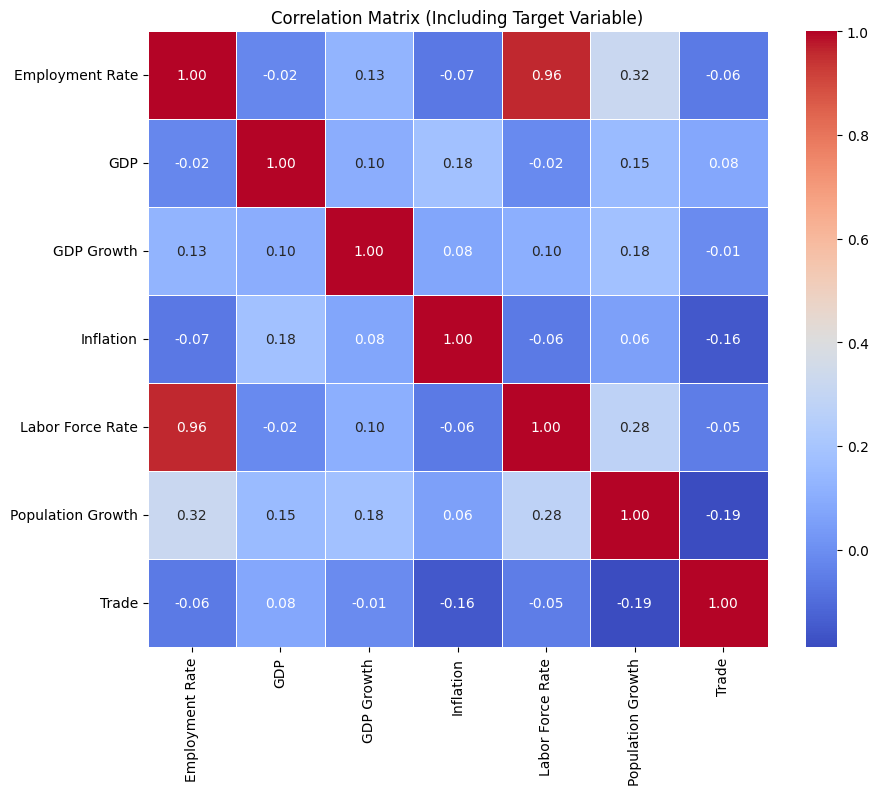

In [19]:
# Calculate correlation matrix including the target variable
correlation_matrix = df_capped[['Employment Rate', 'GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Including Target Variable)')
plt.show()


<ipython-input-20-4149368da701>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Employment Rate', data=df_capped, palette="Set2")


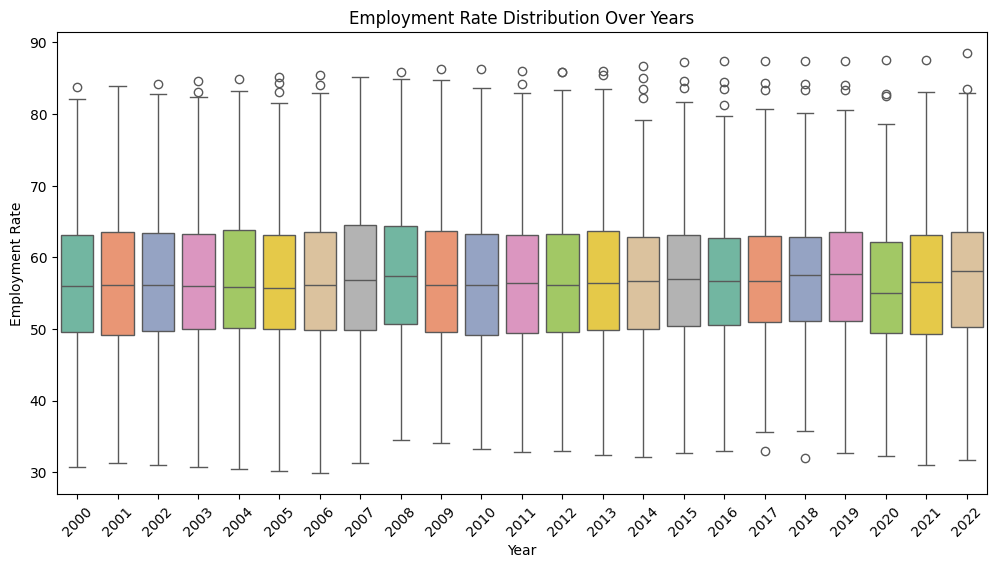

In [20]:
# Boxplot for employment rate over years
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Employment Rate', data=df_capped, palette="Set2")
plt.title('Employment Rate Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.show()


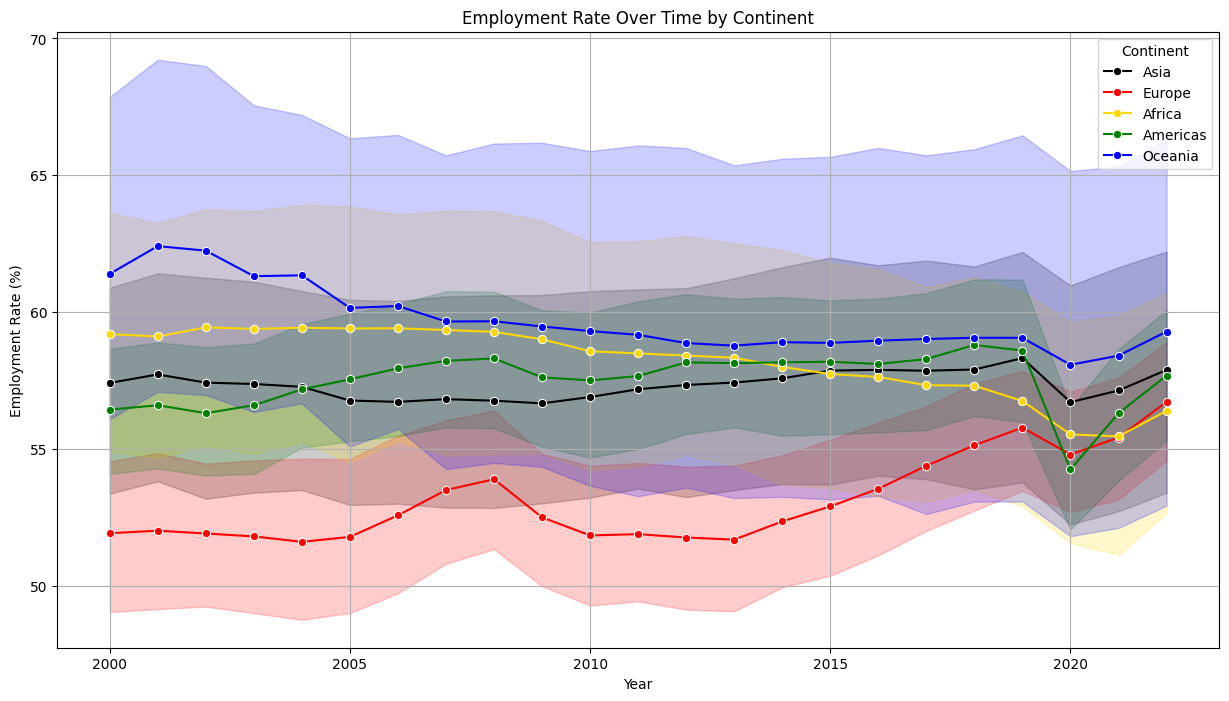

In [21]:
# Group by Continent and Year, and calculate the mean of selected features
continent_time_series = df_capped.groupby(['Continent', 'Year']).agg({
    'Employment Rate': 'mean',
    'GDP': 'mean',
    'Inflation': 'mean',
    'Labor Force Rate': 'mean',
    'Population Growth': 'mean',
    'Trade': 'mean'
}).reset_index()

# Plot time series for each continent
continents = continent_time_series['Continent'].unique()


# Plot using seaborn's lineplot with hue to distinguish continents
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_renamed, x='Year', y='Employment Rate', hue='Continent', marker='o', palette=['black', 'red', 'gold', 'green', 'blue'])
plt.title('Employment Rate Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()



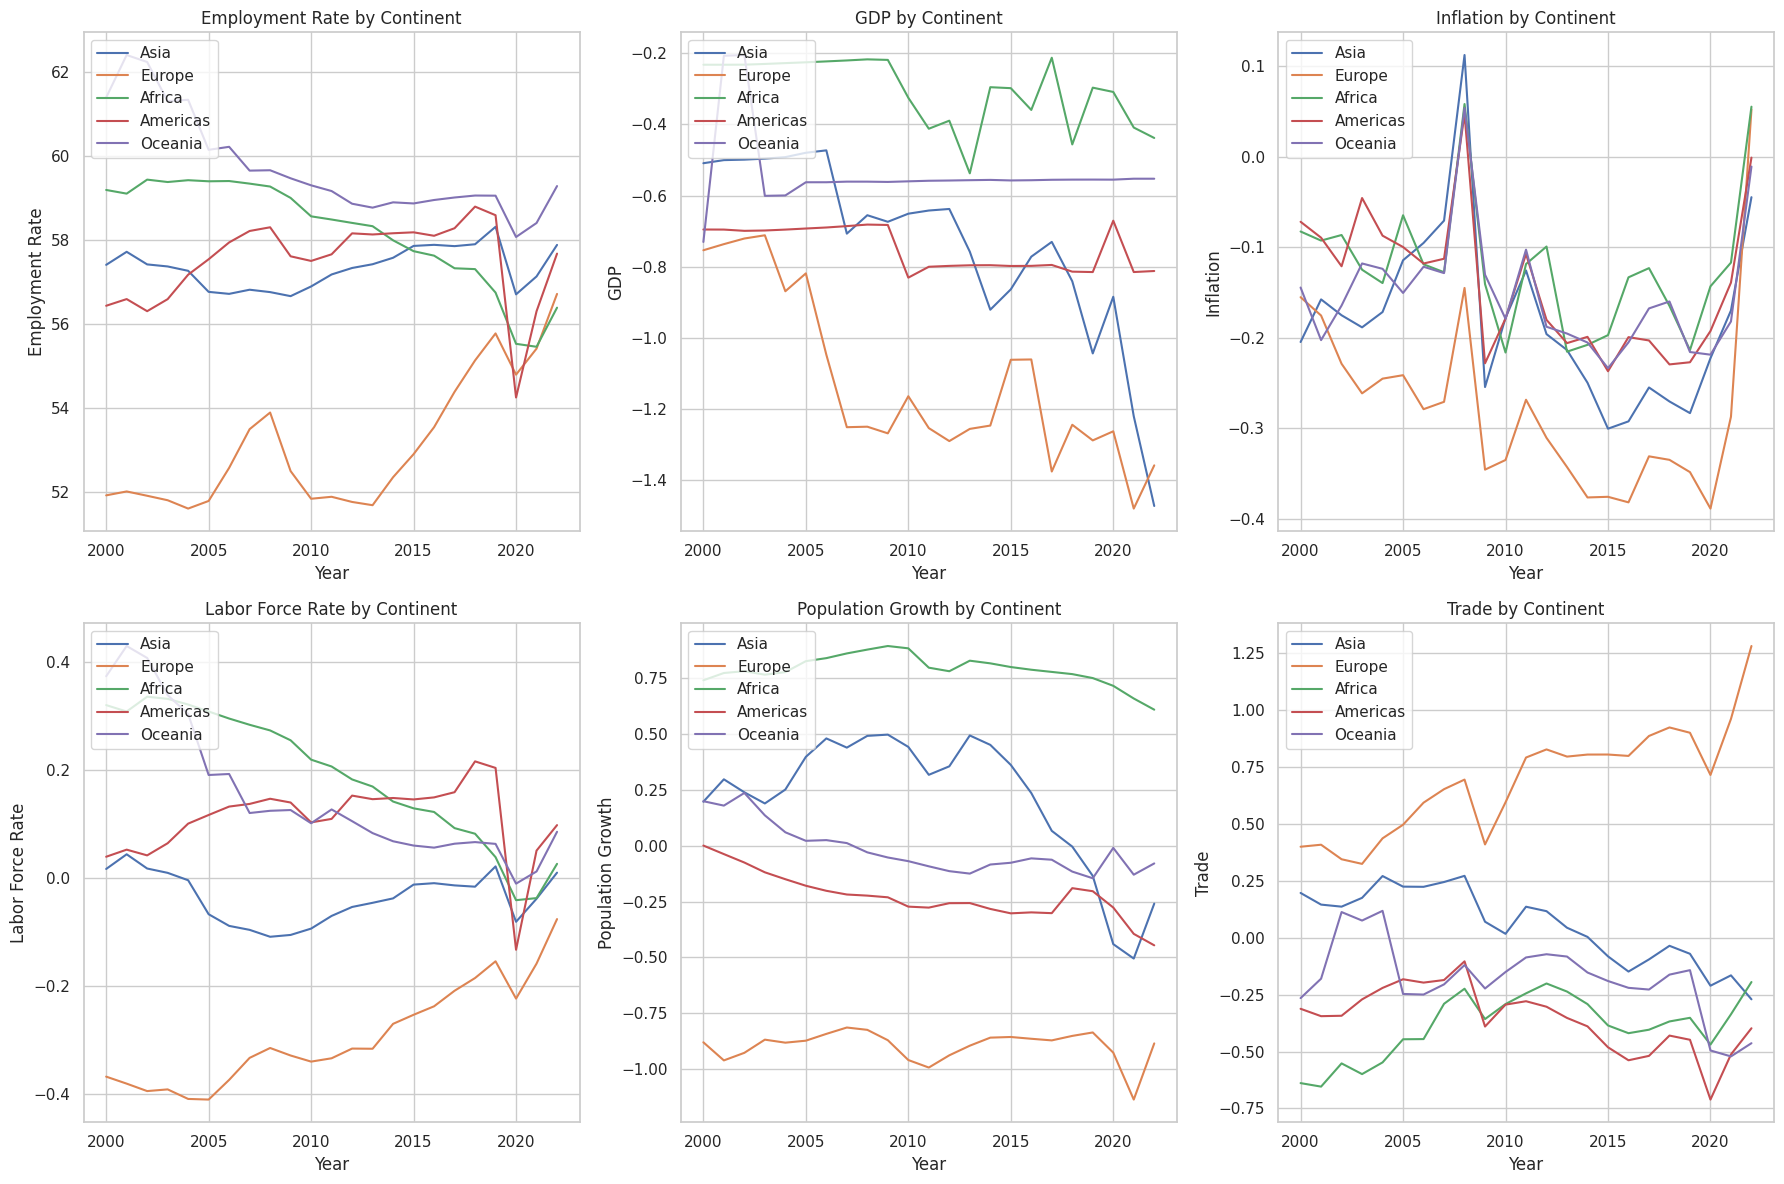

In [38]:
# Create subplots for different features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Features to plot
features = ['Employment Rate', 'GDP', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Loop through features and plot for each continent
for i, feature in enumerate(features):
    ax = axes[i//3, i%3]

    for continent in continents:
        continent_data = continent_time_series[continent_time_series['Continent'] == continent]
        ax.plot(continent_data['Year'], continent_data[feature], label=f'{continent}')

    ax.set_title(f'{feature} by Continent')
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend(loc='upper left')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [22]:
# Split data into training and testing based on the year
train_df = df_renamed[df_renamed['Year'] <= 2020]
test_df = df_renamed[df_renamed['Year'] > 2020]

# Separate the features (X) and target variable (y)
X_train = train_df[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_df['Employment Rate']

X_test = test_df[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_test = test_df['Employment Rate']

# Check the shape of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3214, 6)
Testing data shape: (301, 6)


In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the transformation
print("Scaled Training Data:\n", X_train_scaled[:5])
print("Scaled Testing Data:\n", X_test_scaled[:5])


Scaled Training Data:
 [[-0.24067767  1.39292029  0.18211442 -1.44326444  1.34469894 -1.45191028]
 [-0.24018498  0.33108941 -0.12007395 -1.44899313  1.69664141 -1.44108637]
 [-0.2384052   1.86243813 -0.02299276 -1.45390344  0.23025166 -1.48618486]
 [-0.2381735   0.07207946  0.88526601 -1.45789307  0.3609482  -1.48216532]
 [-0.23669457  3.23019772 -0.81622917 -1.46085971  1.33518772 -1.4522028 ]]
Scaled Testing Data:
 [[-0.23550831 -4.38763092  1.64432917 -2.03618424  0.89152994 -0.53253583]
 [-0.23535723 -1.76598314  1.45984167 -2.4047643   0.69351469 -0.11981848]
 [-0.23315928  0.97320345 -0.36294024 -0.24729732 -1.46963203 -0.05961279]
 [-0.23252727  0.24049835 -0.12311515 -0.08474564 -1.65015728  0.11589497]
 [-0.12523968  0.04947989 -0.09746917 -2.17735562  0.14557816 -0.61212068]]


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:\nMAE: {mae}\nMSE: {mse}\nR^2: {r2}")


Linear Regression Model Performance:
MAE: 2.089180684153083
MSE: 7.9727006385141115
R^2: 0.9314302442018243


In [25]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data into 3D array for LSTM: (samples, timesteps, features)
def reshape_for_lstm(X):
    return X.reshape((X.shape[0], 1, X.shape[1]))

# Scale the features for LSTM (scaling between 0 and 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = reshape_for_lstm(X_train_scaled)
X_test_lstm = reshape_for_lstm(X_test_scaled)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

# Predict with the model
y_pred_lstm = model.predict(X_test_lstm)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"LSTM Model Performance:")
print(f"MAE: {mae_lstm}")
print(f"MSE: {mse_lstm}")
print(f"R^2: {r2_lstm}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3332.4548
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3122.9539
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2561.7610
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1955.2546
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1438.0084
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1035.5251
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 756.8679
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 534.9270
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 388.7478
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 286.8859
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 219.6540
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164.1933
Epoch 13/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140.0451
Epoch 14/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117.2209
Epoch 15/20
101/101 ━━━━━━━━━━━━━━

In [26]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

xg_reg.fit(X_train_scaled, y_train)

# Predict with the model
y_pred_xgb = xg_reg.predict(X_test_scaled)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"R^2: {r2_xgb}")


XGBoost Model Performance:
MAE: 6.694024180364767
MSE: 76.1079100227167
R^2: 0.3454287272048093


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predict with the model
y_pred_rf = rf_reg.predict(X_test_scaled)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R^2: {r2_rf}")


Random Forest Model Performance:
MAE: 1.7110100996677735
MSE: 5.9491752432677725
R^2: 0.9488337124235169


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target for Random Forest model
features = df_renamed[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
target = df_renamed['Employment Rate']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Now filter the data for 2021 and 2022
actual_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# Extract features for the prediction
features_for_prediction = actual_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# Apply scaling to the features (same scaler as before, assuming you have `scaler` defined)
scaled_features = scaler.transform(features_for_prediction)

# Predict using the Random Forest model
predictions_2021_2022 = rf_model.predict(scaled_features)

# Add predictions to the actual data for comparison
actual_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# Display the comparison
print(actual_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])


                  Country Name  Year  Employment Rate  \
21                 Afghanistan  2021           36.263   
22                 Afghanistan  2022           32.333   
45                     Albania  2021           51.336   
46                     Albania  2022           53.304   
69                     Algeria  2021           34.390   
70                     Algeria  2022           36.593   
141                     Angola  2021           64.304   
142                     Angola  2022           64.447   
189                  Argentina  2021           55.085   
190                  Argentina  2022           56.351   
213                    Armenia  2021           56.445   
214                    Armenia  2022           56.548   
261                  Australia  2021           62.478   
262                  Australia  2022           63.699   
285                    Austria  2021           57.200   
286                    Austria  2022           58.441   
309                 Azerbaijan 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
<ipython-input-28-e4400ddd0587>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_2021_2022['Predicted Employment Rate'] = predictions_2021_2022


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid with a smaller range
param_dist = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Min samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters found
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_model = random_search.best_estimator_

# Predict on the test set
predictions = best_rf_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
MAE: 1.378892657251771
MSE: 3.646580353987508
R^2: 0.9714501217286209


In [30]:
# Assuming you split your data earlier, you'll need to combine the actual values with the test dataset
# If you had the original dataframe from which you split, use it to get 'Country Name' and 'Year' columns
test_data = df.loc[X_test.index]  # This assumes X_test was split from your original dataframe 'df'

# Combine actual and predicted values
results = pd.DataFrame({
    'Country Name': test_data['Country Name'],  # Actual country names from test data
    'Year': test_data['Year'],  # Actual years from test data
    'Actual Employment Rate': y_test,  # Actual employment rates from y_test
    'Predicted Employment Rate': predictions  # Predicted values from the tuned model
})

# Filter the data for 2021 and 2022
results_2021_2022 = results[results['Year'].isin([2021, 2022])]

# Display the results for 2021 and 2022
print(results_2021_2022)


             Country Name  Year  Actual Employment Rate  \
1870              Iceland  2022                  71.487   
1174   Dominican Republic  2022                  59.743   
4342           Uzbekistan  2022                  53.626   
4078  Trinidad and Tobago  2022                  52.403   
2757           Montenegro  2021                  45.506   
957               Comoros  2021                  41.323   
1293              Estonia  2021                  59.325   
2517             Maldives  2021                  58.554   
22            Afghanistan  2022                  32.333   
429               Belgium  2021                  51.079   
1005              Croatia  2021                  47.840   
2733             Mongolia  2021                  54.123   
1102              Denmark  2022                  60.591   
933              Colombia  2021                  55.388   
3333               Poland  2021                  56.023   
382              Barbados  2022                  56.828 

In [31]:
# Filter data for 2000 to 2020 for training
train_data = df_renamed[(df_renamed['Year'] >= 2000) & (df_renamed['Year'] <= 2020)]

# Filter data for 2021 and 2022 for testing
test_data_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# Separate features and target for training
X_train = train_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_data['Employment Rate']

# Separate features for testing
X_test_2021_2022 = test_data_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# Initialize the Random Forest model (or your tuned model)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the data from 2000 to 2020
rf_model.fit(X_train, y_train)

# Predict for 2021 and 2022
predictions_2021_2022 = rf_model.predict(X_test_2021_2022)

# Add predictions to the actual data for comparison
test_data_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# Display the comparison
print(test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])

# Evaluate model performance (for 2021 and 2022 only)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_data_2021_2022['Employment Rate'], predictions_2021_2022)
mse = mean_squared_error(test_data_2021_2022['Employment Rate'], predictions_2021_2022)
r2 = r2_score(test_data_2021_2022['Employment Rate'], predictions_2021_2022)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")


                  Country Name  Year  Employment Rate  \
21                 Afghanistan  2021           36.263   
22                 Afghanistan  2022           32.333   
45                     Albania  2021           51.336   
46                     Albania  2022           53.304   
69                     Algeria  2021           34.390   
70                     Algeria  2022           36.593   
141                     Angola  2021           64.304   
142                     Angola  2022           64.447   
189                  Argentina  2021           55.085   
190                  Argentina  2022           56.351   
213                    Armenia  2021           56.445   
214                    Armenia  2022           56.548   
261                  Australia  2021           62.478   
262                  Australia  2022           63.699   
285                    Austria  2021           57.200   
286                    Austria  2022           58.441   
309                 Azerbaijan 

<ipython-input-31-6881ade08611>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_2021_2022['Predicted Employment Rate'] = predictions_2021_2022


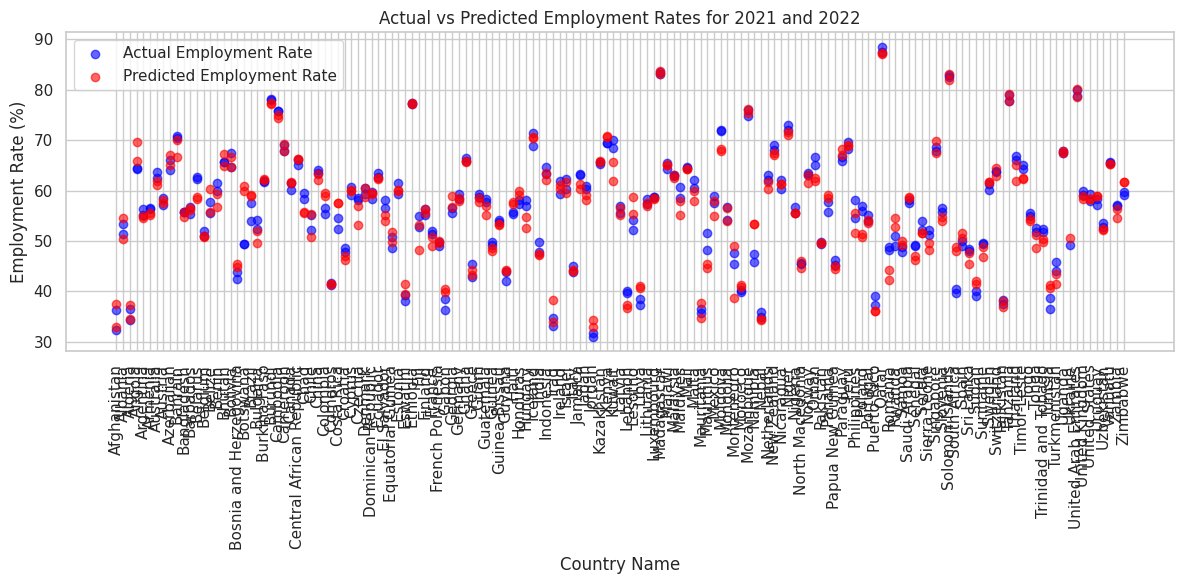

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plotting the Actual vs Predicted Employment Rates
plt.figure(figsize=(12, 6))

# Plot actual values
plt.scatter(test_data_2021_2022['Country Name'], test_data_2021_2022['Employment Rate'], color='blue', label='Actual Employment Rate', alpha=0.6)

# Plot predicted values
plt.scatter(test_data_2021_2022['Country Name'], test_data_2021_2022['Predicted Employment Rate'], color='red', label='Predicted Employment Rate', alpha=0.6)

# Rotate the country names on the x-axis for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Country Name')
plt.ylabel('Employment Rate (%)')
plt.title('Actual vs Predicted Employment Rates for 2021 and 2022')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


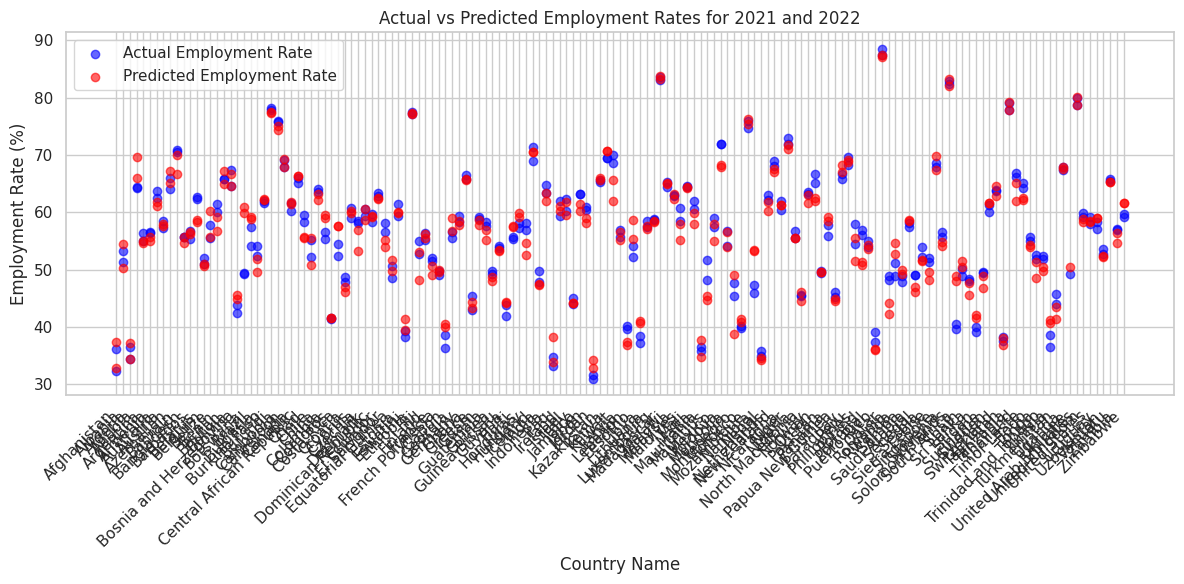

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plotting the Actual vs Predicted Employment Rates
plt.figure(figsize=(12, 6))

# Plot actual values
plt.scatter(test_data_2021_2022['Country Name'], test_data_2021_2022['Employment Rate'], color='blue', label='Actual Employment Rate', alpha=0.6)

# Plot predicted values
plt.scatter(test_data_2021_2022['Country Name'], test_data_2021_2022['Predicted Employment Rate'], color='red', label='Predicted Employment Rate', alpha=0.6)

# Rotate the country names on the x-axis for better readability (greater angle)
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Country Name')
plt.ylabel('Employment Rate (%)')
plt.title('Actual vs Predicted Employment Rates for 2021 and 2022')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [34]:
import plotly.express as px

# Create a DataFrame for Plotly
results_2021_2022 = test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']]

# Create an interactive scatter plot
fig = px.scatter(results_2021_2022, x='Country Name', y='Employment Rate', color='Year',
                 hover_data=['Predicted Employment Rate'],
                 labels={'Employment Rate': 'Actual Employment Rate'},
                 title="Actual vs Predicted Employment Rates for 2021 and 2022")

# Rotate x-axis labels and improve layout
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Country Name',
    yaxis_title='Employment Rate (%)',
    autosize=True
)

fig.show()


In [35]:
import plotly.express as px

# Create a DataFrame for Plotly
results_2021_2022 = test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']]

# Create an interactive scatter plot
fig = px.scatter(results_2021_2022,
                 x='Country Name',
                 y='Employment Rate',
                 color='Year',
                 hover_data=['Country Name', 'Predicted Employment Rate'],
                 labels={'Employment Rate': 'Actual Employment Rate'},
                 title="Actual vs Predicted Employment Rates for 2021 and 2022")

# Hide x-axis labels and ticks
fig.update_layout(
    xaxis=dict(
        showticklabels=False,  # Hide x-axis labels
    ),
    xaxis_title='All Country ',  # Remove the title for the x-axis
    yaxis_title='Employment Rate (%)',  # Title for y-axis
    autosize=True
)

fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



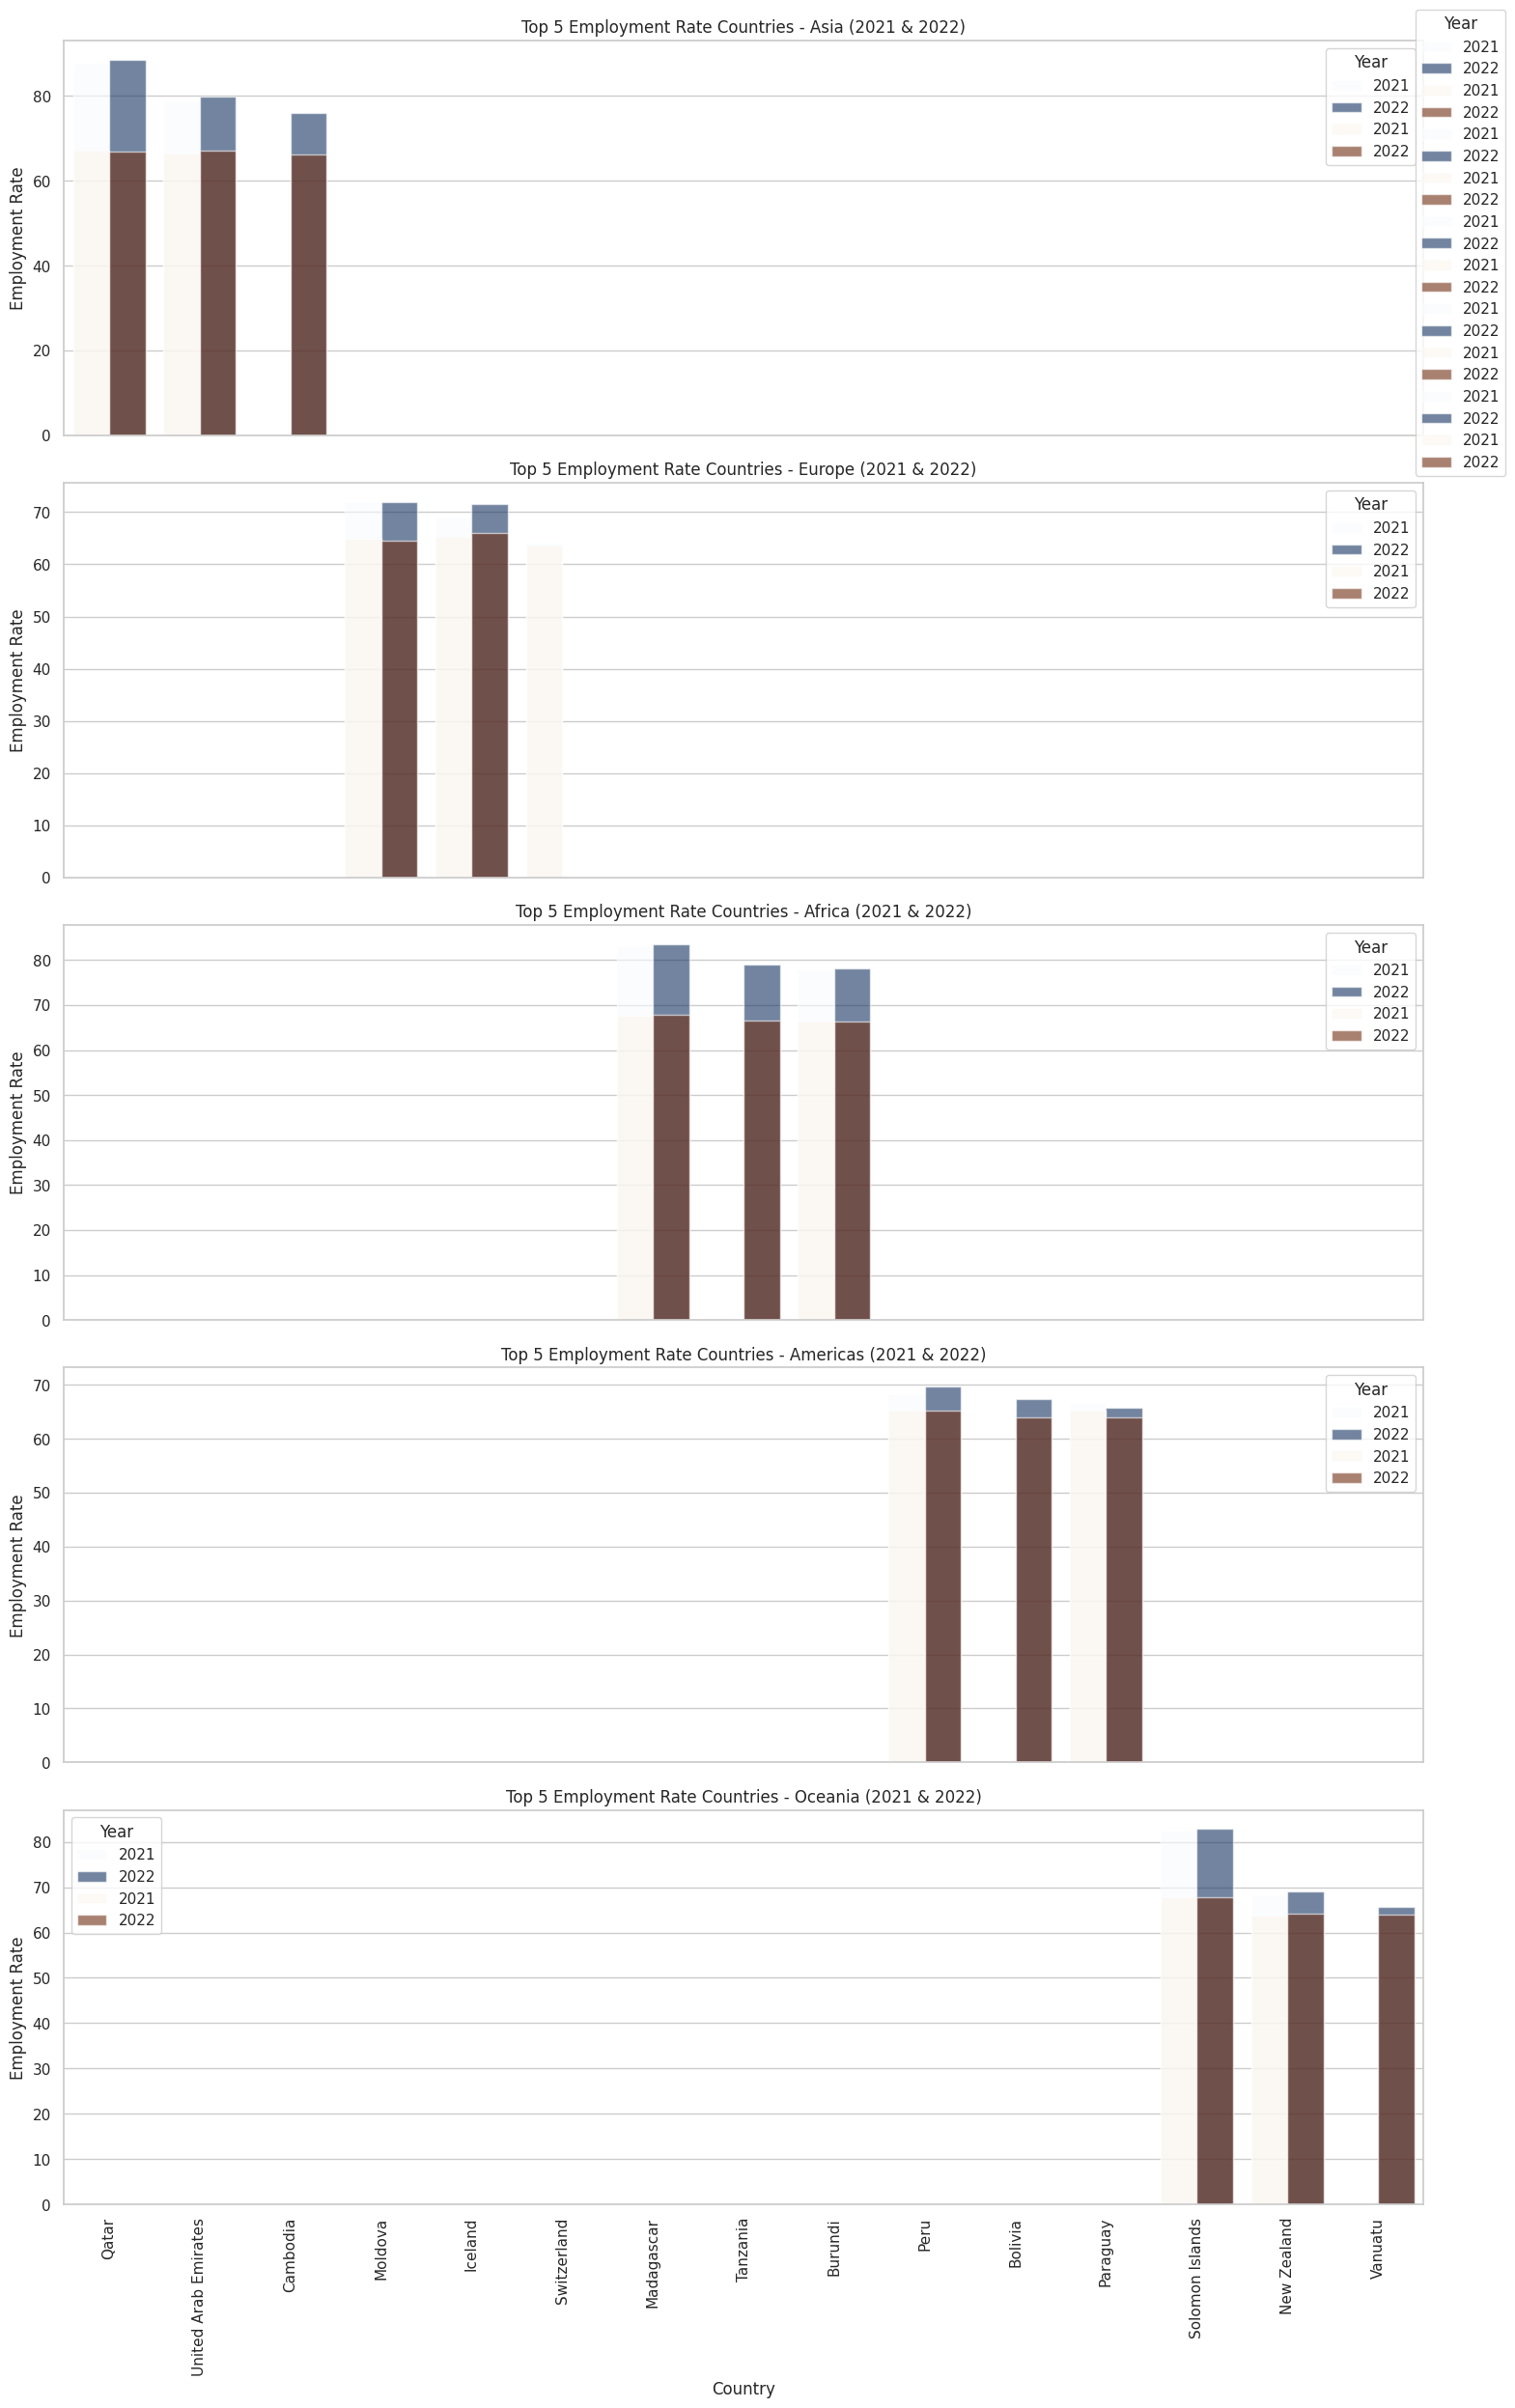

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_renamed' has columns for Continent, Country Name, Year, Employment Rate, and Predicted Employment Rate

# Initialize an empty list to store top 5 countries from each continent for 2021 and 2022
top_5_by_continent_2021_2022 = []

# Group by continent and select top 5 countries based on Employment Rate for 2021 and 2022
for continent in df_renamed['Continent'].unique():
    # Filter data for 2021 and 2022
    continent_data = df_renamed[(df_renamed['Continent'] == continent) &
                                 (df_renamed['Year'].isin([2021, 2022]))]
    # Sort by Employment Rate and select the top 5 countries
    top_countries = continent_data.nlargest(5, 'Employment Rate')
    top_5_by_continent_2021_2022.append(top_countries)

# Combine the top countries from each continent into one DataFrame
top_5_by_continent_2021_2022_df = pd.concat(top_5_by_continent_2021_2022)

# Ensure the 'Predicted Employment Rate' column exists in the DataFrame
# If predictions were not added before, we can add them like so:
if 'Predicted Employment Rate' not in top_5_by_continent_2021_2022_df.columns:
    # Extract features for prediction and apply the trained RandomForest model
    features_for_prediction = top_5_by_continent_2021_2022_df[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
    scaled_features = scaler.transform(features_for_prediction)  # Assuming `scaler` is defined
    predictions = rf_model.predict(scaled_features)
    top_5_by_continent_2021_2022_df['Predicted Employment Rate'] = predictions

# Create a figure with 5 subplots (one for each continent)
fig, axes = plt.subplots(5, 1, figsize=(15, 25), sharex=True)

# List of continents for which we will plot
continents = df_renamed['Continent'].unique()

# Plot data for each continent
for i, continent in enumerate(continents):
    continent_data = top_5_by_continent_2021_2022_df[top_5_by_continent_2021_2022_df['Continent'] == continent]

    # Check if both 'Employment Rate' and 'Predicted Employment Rate' columns are available
    if 'Employment Rate' in continent_data.columns and 'Predicted Employment Rate' in continent_data.columns:
        # Plotting the actual vs predicted employment rates for the current continent
        sns.barplot(data=continent_data, x='Country Name', y='Employment Rate', hue='Year',
                    palette='Blues', alpha=0.6, ax=axes[i])

        sns.barplot(data=continent_data, x='Country Name', y='Predicted Employment Rate', hue='Year',
                    palette='Oranges', alpha=0.6, ax=axes[i])

        # Rotate the x-axis labels to avoid overlap
        axes[i].tick_params(axis='x', rotation=90)

        # Set title and labels for the subplot
        axes[i].set_title(f'Top 5 Employment Rate Countries - {continent} (2021 & 2022)')
        axes[i].set_ylabel('Employment Rate')
        axes[i].set_xlabel('Country')
    else:
        print(f"Columns missing for {continent}. Skipping plot.")

# Add a legend and adjust the layout
fig.legend(title='Year', loc='upper right', bbox_to_anchor=(1.05, 1), bbox_transform=fig.transFigure)
fig.tight_layout()

# Show the plot
plt.show()


In [37]:
from tabulate import tabulate

# Extract relevant columns for the comparison table
comparison_data = test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']]

# Convert the DataFrame to a tabular format using tabulate
table = tabulate(comparison_data, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

# Print the evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")


+--------------------------+------+-----------------+---------------------------+
|       Country Name       | Year | Employment Rate | Predicted Employment Rate |
+--------------------------+------+-----------------+---------------------------+
|       Afghanistan        | 2021 |     36.263      |     37.44285999999995     |
|       Afghanistan        | 2022 |     32.333      |    32.918920000000014     |
|         Albania          | 2021 |     51.336      |     50.34927999999999     |
|         Albania          | 2022 |     53.304      |    54.561340000000015     |
|         Algeria          | 2021 |      34.39      |    34.517010000000035     |
|         Algeria          | 2022 |     36.593      |     37.23869999999998     |
|          Angola          | 2021 |     64.304      |     65.95795999999999     |
|          Angola          | 2022 |     64.447      |     69.61677999999996     |
|        Argentina         | 2021 |     55.085      |     55.01389000000002     |
|        Argenti